## Barcelona Census Data Exploration by Tiffany Green

Greetings! Casey Leedham and I are tackling some census data from two different years in Barcelona. The data itself looks at the frequency of type of property owner. I have manipulated the data to (1.) read in English, and (2.) sum the number of properties within each neighborhood under two of the ownership categories. This data does not contain the boundaries of the neighborhoods; it simply lists codes for the Neighborhoods. Casey's data is older and doesn't have the same property subtypes.

As an aside: I would be interested in learning more about how to really manipulate how the data fits in the frame via code rather than in Excel. The database from the census held number, value, and size of property owner type in a single column, with another column designating which type of value it was. All of this was broken by census tract, of which there were 1-20 within each neighborhood. I manually summed and moved that data in Excel, but couldn't help but thinking that there was a better way. I'm sure there was! So, for this reason, I'm analyzing 2 ownership types rather than the provided 18. 

So, I have a few goals with the data.

1st - I'll need to join the csv and the geoJSON file I found of the barrio (neighborhood) outlines. The codes are the same. I've googled a fair amount, and will hop into the Slack if need be.

2nd - Let me see this! I'm hoping to get some meaningful visual (graphs and maps) out of the data.



### Here goes! Starting with bringing in helpful libraries.

In [84]:
# for general data wrangling tasks. good to know that both pd and gpd are needed.
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

### Importing the 2 datafiles. 

In [85]:
#creating file of barcelona property owners dataframe
bdf = gpd.read_file('data/Barcelona_Span_Foreign_Owners_ 2020.csv')

In [86]:
#creating file of geodataframe
gdf = gpd.read_file('data/shapefiles_barrio_barcelona.geojson')
















### Clean the dataframes. 

I don't need all of this info and I want all of the titles in English. 

In [87]:
#let's take a look...
bdf.head()

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,geometry
0,1,el Raval,17486,2570,None
1,2,el Gòtic,7946,1216,None
2,3,la Barceloneta,7346,912,None
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,None
4,5,el Fort Pienc,19416,908,None


^ This one looks pretty good, but should really have a capital G on Geometry. This will be important for connecting the two tables. 

In [88]:
#rename geometry title to firstcap
bdf.columns = ['Neighborhood Code', 'Neighborhood Name','Spanish Individuals','Foreign Individuals','Geometry']
bdf.head()

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,Geometry
0,1,el Raval,17486,2570,None
1,2,el Gòtic,7946,1216,None
2,3,la Barceloneta,7346,912,None
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,None
4,5,el Fort Pienc,19416,908,None


That's better. :)

In [89]:
#see what the beginning of the dataframe looks like
gdf.head()

,cartodb_id,c_distri,n_distri,c_barri,n_barri,homes,dones,area,perim,coord_x,coord_y,web_1,web_2,web_3,web_4,geometry
0,22,05,SarriÃ -Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",2269,2397,1.152241e+07,34375.351100,423973.042970,4.585950e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,05,SarriÃ -Sant Gervasi,23,SarriÃ,11552,13267,3.041669e+06,10353.319052,426217.739662,4.584038e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,05,SarriÃ -Sant Gervasi,25,Sant Gervasi - la Bonanova,11777,13797,2.235228e+06,8692.896014,427395.900450,4.584820e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,07,Horta-GuinardÃ³,43,Horta,12590,14086,3.082269e+06,10888.952207,429246.476929,4.588141e+06,http://www.bcn.cat/horta-guinardo,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,03,Sants-MontjuÃ¯c,12,la Marina del Prat Vermell,577,561,1.428413e+07,43242.508489,428356.498514,4.576986e+06,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."


For the geodataframe, I really only need the code for the neighborhoods (c_barri), the neighborhood names (n_barri) and the geometry columns. 

In [90]:
#trim gdf by columns needed. 
gdf_trimmed = gdf [['c_barri', 'n_barri', 'geometry']]
gdf_trimmed

,c_barri,n_barri,geometry
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,la Marina del Prat Vermell,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."
...,...,...,...
68,59,el Bon Pastor,"MULTIPOLYGON (((2.20834 41.42868, 2.20673 41.4..."
69,73,la Verneda i la Pau,"MULTIPOLYGON (((2.20834 41.42868, 2.20830 41.4..."
70,60,Sant Andreu,"MULTIPOLYGON (((2.19835 41.44873, 2.19777 41.4..."
71,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."


Let's just go ahead and make it easier on ourselves and change the column titles to English. 

In [91]:
#rename columns
gdf_trimmed.columns = ['Neighborhood Code','Neighborhood Name','Geometry']
gdf_trimmed

,Neighborhood Code,Neighborhood Name,Geometry
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,la Marina del Prat Vermell,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."
...,...,...,...
68,59,el Bon Pastor,"MULTIPOLYGON (((2.20834 41.42868, 2.20673 41.4..."
69,73,la Verneda i la Pau,"MULTIPOLYGON (((2.20834 41.42868, 2.20830 41.4..."
70,60,Sant Andreu,"MULTIPOLYGON (((2.19835 41.44873, 2.19777 41.4..."
71,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."


Sort the dataframe so that the neighborhood code is in the right order. This way we can loop the geometry into the other dataframe. 

In [92]:
#sort by NH code
gdf_sorted = gdf_trimmed.sort_values(by= 'Neighborhood Code',ascending = True)
gdf_sorted.head()

,Neighborhood Code,Neighborhood Name,Geometry
5,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
23,2,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
26,3,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
27,4,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
28,5,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [93]:
# Reset the dataframe index. Much appreciation to Casey for figuring these next bits out!!

gdf_sorted = gdf_sorted.reset_index(drop=True)
gdf_sorted.head()

,Neighborhood Code,Neighborhood Name,Geometry
0,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [94]:
#make sure the end of the data is clean
gdf_sorted.tail()

,Neighborhood Code,Neighborhood Name,Geometry
68,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."
69,70,el BesÃ²s i el Maresme,"MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4..."
70,71,ProvenÃ§als del Poblenou,"MULTIPOLYGON (((2.21301 41.41294, 2.21190 41.4..."
71,72,Sant MartÃ­ de ProvenÃ§als,"MULTIPOLYGON (((2.19660 41.42346, 2.19705 41.4..."
72,73,la Verneda i la Pau,"MULTIPOLYGON (((2.20834 41.42868, 2.20830 41.4..."


In [95]:
#check to make sure the other df looks the same
bdf.tail()

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,Geometry
68,69,Diagonal Mar i el Front Marítim del Poblenou,10997,1664,None
69,70,el Besòs i el Maresme,9442,900,None
70,71,Provençals del Poblenou,12510,542,None
71,72,Sant Martí de Provençals,15520,386,None
72,73,la Verneda i la Pau,16305,401,None


In [96]:
#Let's just change the name so each has the same format. 
gdf = gdf_sorted
gdf

,Neighborhood Code,Neighborhood Name,Geometry
0,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."
...,...,...,...
68,69,Diagonal Mar i el Front MarÃ­tim del Poblenou,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."
69,70,el BesÃ²s i el Maresme,"MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4..."
70,71,ProvenÃ§als del Poblenou,"MULTIPOLYGON (((2.21301 41.41294, 2.21190 41.4..."
71,72,Sant MartÃ­ de ProvenÃ§als,"MULTIPOLYGON (((2.19660 41.42346, 2.19705 41.4..."


In [97]:
bdf

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,Geometry
0,1,el Raval,17486,2570,None
1,2,el Gòtic,7946,1216,None
2,3,la Barceloneta,7346,912,None
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,None
4,5,el Fort Pienc,19416,908,None
...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,10997,1664,None
69,70,el Besòs i el Maresme,9442,900,None
70,71,Provençals del Poblenou,12510,542,None
71,72,Sant Martí de Provençals,15520,386,None


Alright. So at this point, the two dataframes have English and matching titles. The indices are in the correct place. Ideally, we're in a good spot with the data. 

### Check the data type compatability. 

In [98]:
#show datatypes of each column
gdf.dtypes

Neighborhood Code       int64
Neighborhood Name      object
Geometry             geometry
dtype: object

In [99]:
#show datatypes of each column
bdf.dtypes

Neighborhood Code        object
Neighborhood Name        object
Spanish Individuals      object
Foreign Individuals      object
Geometry               geometry
dtype: object

In [100]:
#change type to integer for bdf objects that have numbers: NH Code, Sp Ind, and For Ind. 
bdf['Neighborhood Code'] = bdf['Neighborhood Code'].astype(int)
bdf['Spanish Individuals'] = bdf['Spanish Individuals'].astype(int)
bdf['Foreign Individuals'] = bdf['Foreign Individuals'].astype(int)

In [101]:
#Make sure it worked
bdf.dtypes

Neighborhood Code         int64
Neighborhood Name        object
Spanish Individuals       int64
Foreign Individuals       int64
Geometry               geometry
dtype: object

In [102]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Neighborhood Code  73 non-null     int64   
 1   Neighborhood Name  73 non-null     object  
 2   Geometry           73 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 1.8+ KB


## Bring Geometry data into Census data. 

Ok, so I think the tables are ready to join. Let me be honest: Casey really pulled this together. Her notebook says that "it took a lot of trial and errror." We zoomed for 3 hours trying to get this dang function to work. Three hours later she sent a functioning plot. 

All of that to say: Casey's a **hardworking genius.** Credit where it's due. 

In [103]:
# Use a double for loop to add geometry values from gdf to bdf

for index in bdf:
    for index in gdf:
            bdf.Geometry = gdf.Geometry
bdf

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,Geometry
0,1,el Raval,17486,2570,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Gòtic,7946,1216,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,7346,912,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,19416,908,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."
...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,10997,1664,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."
69,70,el Besòs i el Maresme,9442,900,"MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4..."
70,71,Provençals del Poblenou,12510,542,"MULTIPOLYGON (((2.21301 41.41294, 2.21190 41.4..."
71,72,Sant Martí de Provençals,15520,386,"MULTIPOLYGON (((2.19660 41.42346, 2.19705 41.4..."


In [104]:
#make sure the dataframe is a geodataframe
type(bdf)



geopandas.geodataframe.GeoDataFrame

In [105]:
bdf

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,Geometry
0,1,el Raval,17486,2570,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Gòtic,7946,1216,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,7346,912,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,19416,908,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."
...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,10997,1664,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."
69,70,el Besòs i el Maresme,9442,900,"MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4..."
70,71,Provençals del Poblenou,12510,542,"MULTIPOLYGON (((2.21301 41.41294, 2.21190 41.4..."
71,72,Sant Martí de Provençals,15520,386,"MULTIPOLYGON (((2.19660 41.42346, 2.19705 41.4..."


In [106]:
#as it so happens, .plot doesn't like the capital G on geomettry. Changing that back. 
bdf.columns = ['Neighborhood Code', 'Neighborhood Name','Spanish Individuals','Foreign Individuals','geometry']
bdf.head()


,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,geometry
0,1,el Raval,17486,2570,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Gòtic,7946,1216,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,7346,912,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,19416,908,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


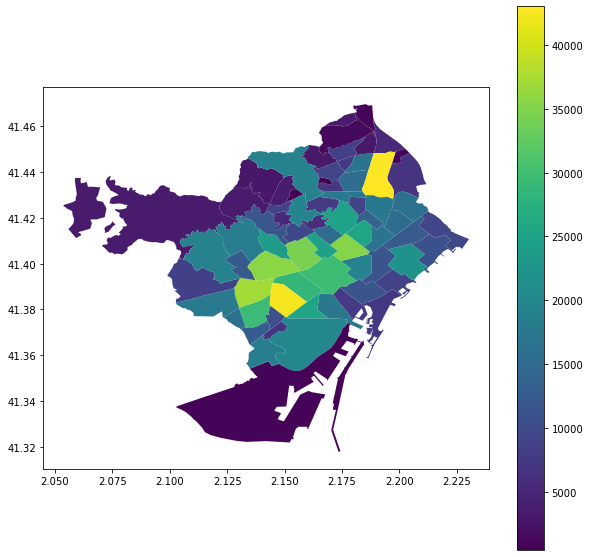

In [107]:

bdf.plot(figsize=(10,10),column='Spanish Individuals',legend=True)

## Stats & Plots

I'd like to create a total number of properties column for the dataset, as well as some percentages. Then I'll be able to create some plots of those percentages. 

In [108]:
#because I got to this really great point where the df has all of the data I want, I'm going to create a copy 
#of the dataframe bc I'm scared I'll mess it up. lol. 
new_bdf=bdf

In [109]:
# creating a column for totals between Foreign Individuals and geometry.
new_bdf['Total Properties'] = new_bdf['Spanish Individuals']+new_bdf['Foreign Individuals']
new_bdf

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,geometry,Total Properties
0,1,el Raval,17486,2570,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",20056
1,2,el Gòtic,7946,1216,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3...",9162
2,3,la Barceloneta,7346,912,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3...",8258
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3...",13309
4,5,el Fort Pienc,19416,908,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3...",20324
...,...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,10997,1664,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4...",12661
69,70,el Besòs i el Maresme,9442,900,"MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4...",10342
70,71,Provençals del Poblenou,12510,542,"MULTIPOLYGON (((2.21301 41.41294, 2.21190 41.4...",13052
71,72,Sant Martí de Provençals,15520,386,"MULTIPOLYGON (((2.19660 41.42346, 2.19705 41.4...",15906


In [110]:
#creating columns for percentages for span and foreign
new_bdf['Percent Spanish'] = new_bdf['Spanish Individuals']/new_bdf['Total Properties']*100
new_bdf['Percent Foreign'] = new_bdf['Foreign Individuals']/new_bdf['Total Properties']*100

In [111]:
new_bdf.head()

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,geometry,Total Properties,Percent Spanish,Percent Foreign
0,1,el Raval,17486,2570,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",20056,87.185880,12.814120
1,2,el Gòtic,7946,1216,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3...",9162,86.727789,13.272211
2,3,la Barceloneta,7346,912,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3...",8258,88.956164,11.043836
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3...",13309,86.099632,13.900368
4,5,el Fort Pienc,19416,908,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3...",20324,95.532376,4.467624


In [112]:
#want to change the order of the dataframe
col_list=bdf.columns.tolist()

In [113]:
col_list

['Neighborhood Code',
 'Neighborhood Name',
 'Spanish Individuals',
 'Foreign Individuals',
 'geometry',
 'Total Properties',
 'Percent Spanish',
 'Percent Foreign']

In [114]:
#reorder columns
col_list = ['Neighborhood Code',
    'Neighborhood Name',
    'Spanish Individuals',
    'Percent Spanish',
    'Foreign Individuals',
    'Percent Foreign',
    'Total Properties',
    'geometry']

In [115]:
#pass reordered columns to dataframe
new_bdf = new_bdf[col_list]
new_bdf

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Percent Spanish,Foreign Individuals,Percent Foreign,Total Properties,geometry
0,1,el Raval,17486,87.185880,2570,12.814120,20056,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Gòtic,7946,86.727789,1216,13.272211,9162,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,7346,88.956164,912,11.043836,8258,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,86.099632,1850,13.900368,13309,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,19416,95.532376,908,4.467624,20324,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."
...,...,...,...,...,...,...,...,...
68,69,Diagonal Mar i el Front Marítim del Poblenou,10997,86.857278,1664,13.142722,12661,"MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4..."
69,70,el Besòs i el Maresme,9442,91.297621,900,8.702379,10342,"MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4..."
70,71,Provençals del Poblenou,12510,95.847380,542,4.152620,13052,"MULTIPOLYGON (((2.21301 41.41294, 2.21190 41.4..."
71,72,Sant Martí de Provençals,15520,97.573243,386,2.426757,15906,"MULTIPOLYGON (((2.19660 41.42346, 2.19705 41.4..."


Ahh, much better. Now I can work on some stats. 

In [116]:
#see what neighborhood makeup of spanish individual ownership looks like
new_bdf['Spanish Individuals'].describe()

count       73.000000
mean     14532.000000
std      10350.427711
min        491.000000
25%       7245.000000
50%      12308.000000
75%      19412.000000
max      43015.000000
Name: Spanish Individuals, dtype: float64

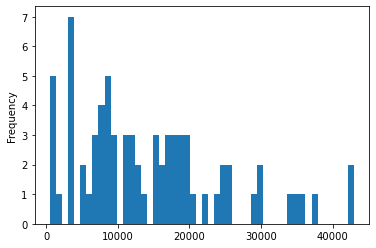

In [117]:
#graph it 
new_bdf['Spanish Individuals'].plot.hist(bins=50)

Next, I want to see the number of spanish individuals who own property in each neighborhood.

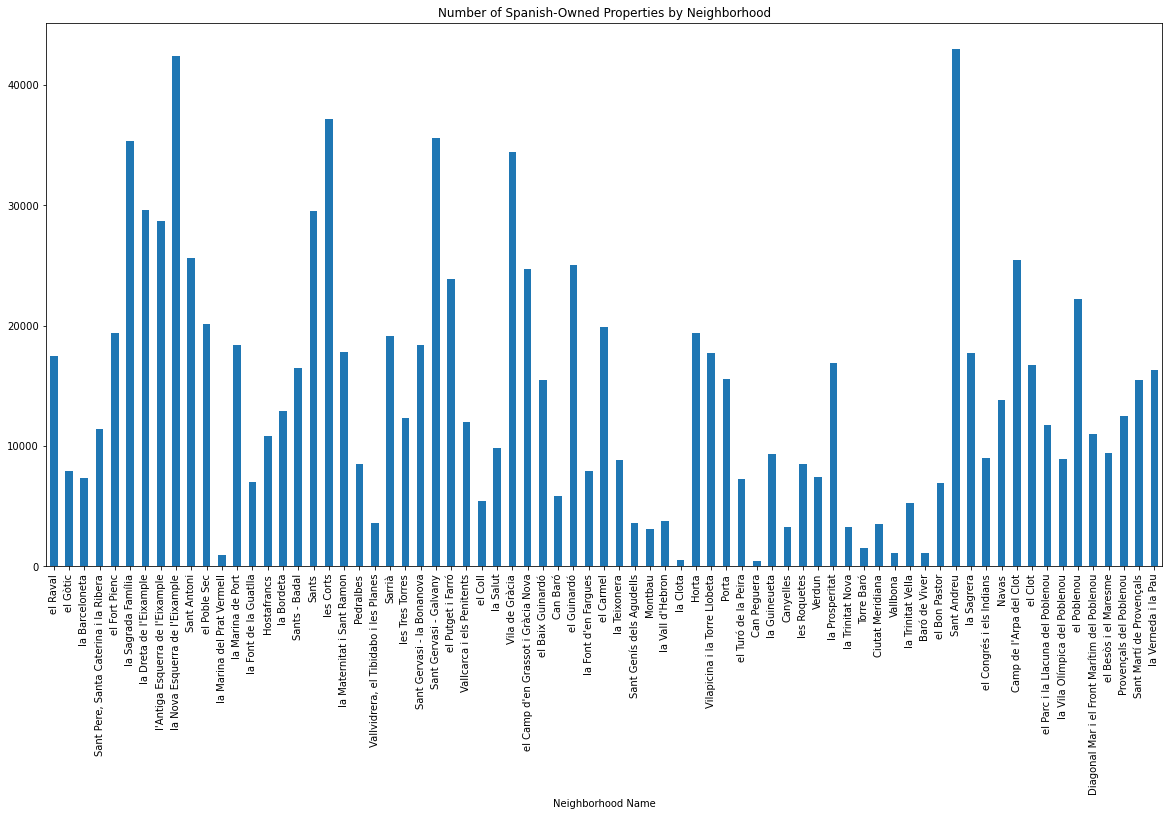

In [76]:
# create chart with NH name on the x-axis and spanish individuals on the y-axis 
# for some reason, I can't get the x axis to show the names instead of the index. 
# found this: df.set_index("name",drop=True,inplace=True)
# creating yet another df b/c i don't want to mess up the index 
dummy_bdf = new_bdf
#you can't run this line of code twice. It will error. Took me forever to figure that out. 
dummy_bdf.set_index("Neighborhood Name",drop=True,inplace=True)
dummy_bdfa['Spanish Individuals'].plot.bar(figsize = (20, 10), title = 'Number of Spanish-Owned Properties by Neighborhood')


Wow, it worked! Not sure what the deal was with the x-axis not working correctly, but it's all good. 


I want to create a couple of side-by-side plots that show the top 10 neighborhoods that have the highest percent of Spanish-Owned properties and Foreign-Owned properties. 


In [128]:
#I think I messed up the index on this...? Yes.
new_bdf.head()

,Neighborhood Code,Spanish Individuals,Percent Spanish,Foreign Individuals,Percent Foreign,Total Properties,geometry
Neighborhood Name,,,,,,,
el Raval,1,17486,87.185880,2570,12.814120,20056,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
el Gòtic,2,7946,86.727789,1216,13.272211,9162,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
la Barceloneta,3,7346,88.956164,912,11.043836,8258,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
"Sant Pere, Santa Caterina i la Ribera",4,11459,86.099632,1850,13.900368,13309,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
el Fort Pienc,5,19416,95.532376,908,4.467624,20324,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [129]:
#and obviously this one. Sigh. Apparently I don't know how to do that. Will need to check. lol.
dummy_bdf.head()

,Neighborhood Code,Spanish Individuals,Percent Spanish,Foreign Individuals,Percent Foreign,Total Properties,geometry
Neighborhood Name,,,,,,,
el Raval,1,17486,87.185880,2570,12.814120,20056,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
el Gòtic,2,7946,86.727789,1216,13.272211,9162,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
la Barceloneta,3,7346,88.956164,912,11.043836,8258,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
"Sant Pere, Santa Caterina i la Ribera",4,11459,86.099632,1850,13.900368,13309,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
el Fort Pienc,5,19416,95.532376,908,4.467624,20324,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [130]:
#OMG this one is ok. 
bdf.head()

,Neighborhood Code,Neighborhood Name,Spanish Individuals,Foreign Individuals,geometry,Total Properties,Percent Spanish,Percent Foreign
0,1,el Raval,17486,2570,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",20056,87.185880,12.814120
1,2,el Gòtic,7946,1216,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3...",9162,86.727789,13.272211
2,3,la Barceloneta,7346,912,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3...",8258,88.956164,11.043836
3,4,"Sant Pere, Santa Caterina i la Ribera",11459,1850,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3...",13309,86.099632,13.900368
4,5,el Fort Pienc,19416,908,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3...",20324,95.532376,4.467624


 ## SUBPLOTS
 
 Ok, back to the subplots. For real this time. 

In [136]:
#to get the top 10, I need to sort the variables
spercent= bdf.sort_values(by='Percent Spanish',ascending = False)

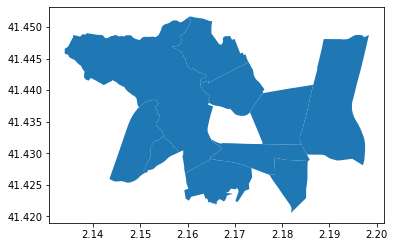

In [137]:
spercent.head(10).plot()

While this is nice, it's not actually what I was wanting. I want the colorful one. But going to go ahead and create a sorted foreign percent one as well. 

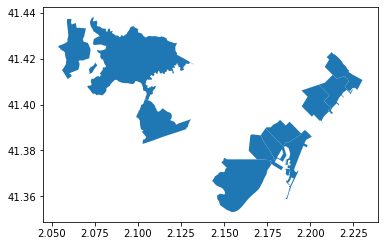

In [138]:
#create the same for the top 10 nhs with 
fpercent= bdf.sort_values(by='Percent Foreign',ascending = False)
fpercent.head(10).plot()

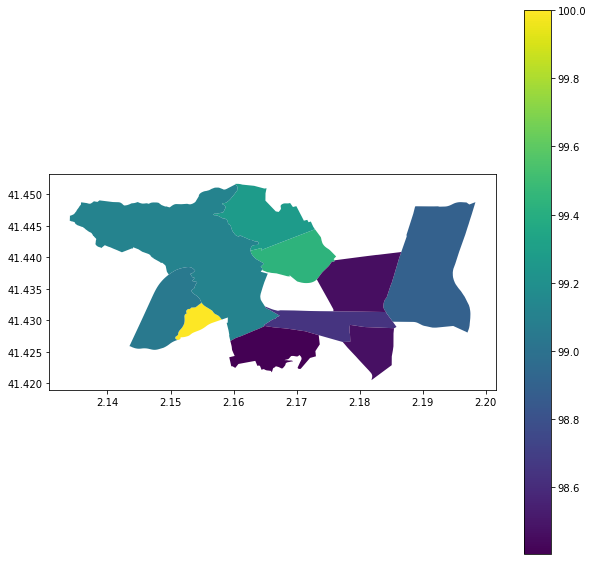

In [140]:
#the prettier one. :) 
spercent.head(10).plot(figsize=(10,10),column='Percent Spanish',legend=True)

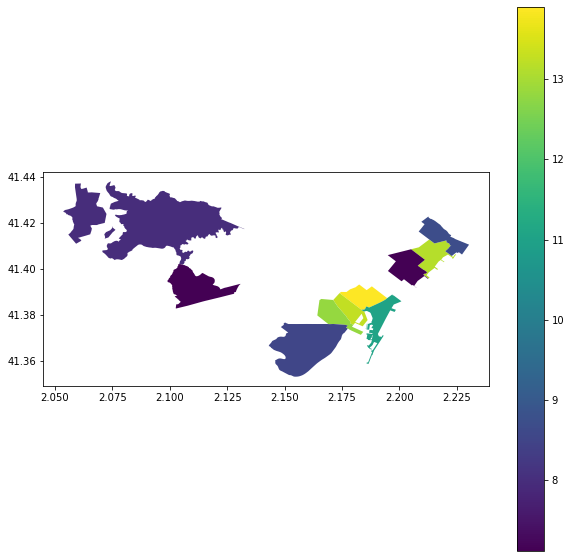

In [142]:
#and again for foreign
fpercent.head(10).plot(figsize=(10,10),column='Percent Foreign',legend=True)

Text(0.5, 1.0, 'Top 10 NHs with Foreign-Owned')

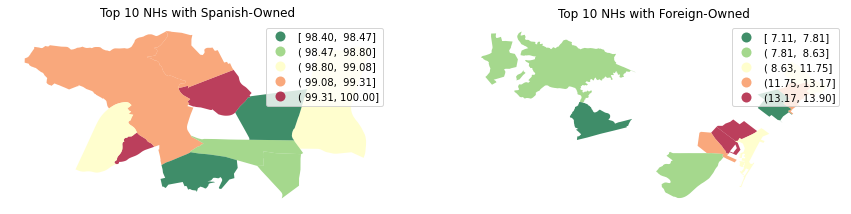

In [145]:
# make these into 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
spercent.head(10).plot(column='Percent Spanish', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Top 10 NHs with Spanish-Owned")

# spatial lag map on the right
fpercent.head(10).plot(column='Percent Foreign', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Top 10 NHs with Foreign-Owned")